In [1]:
# create filter whose width varies by location 
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.ndimage as si

In [2]:
this_sat = 'j3'
lon_w = 0
lon_e = 360
lat_s = -65
lat_n = 65

In [3]:
# -- LOAD parsed data (processed by track number)
load_sat = pickle.load(open(this_sat + '/' + this_sat +'_parsed_tracks.p', 'rb'))
lon_t = load_sat['lon_t']
lat_t = load_sat['lat_t']
track_t = load_sat['track_t']
sla = load_sat['sla']
dist = load_sat['dist']
lon_record = load_sat['lon_record']
lat_record = load_sat['lat_record']
time_record = load_sat['time_record']
track_record = load_sat['track_record']

In [4]:
# select single track for development of tool 
index_i = np.where(track_record == np.array([226]))[0][0]
index_i

225

In [5]:
test_lon = lon_record[index_i]
test_lat = lat_record[index_i]
test_dist = dist[index_i]
test_sla = sla[index_i][100, :]

In [7]:
# for each distance along-track need to grid such that +/- some km, the grid spacing = 1/4 degree 
loc_res = 0.25 # in degrees
cent_lat = test_lat[10]
x = 1852 * 60 * np.cos(np.deg2rad(cent_lat)) * (loc_res)
y = 1852 * 60 * (loc_res)

In [8]:
print(x)
print(y)

19333.418582509275
27780.0


In [9]:
# can filter to check the variable effect of the filter as a function of latitude 
fake_sla = .25*np.sin(test_dist/50)
# replace test_sla with fake_sla

In [13]:
loc_res = 0.1 # in degrees (grid step to which we are filtering)
sigma = 4 # coarsening factor (in units relative to the loc_res grid step)
sla_filt = np.nan * np.ones(len(test_sla))
start_d = 10
end_d = 570
for i in range(start_d, end_d): 
    this_lon_step = 1852 * 60 * np.cos(np.deg2rad(test_lat[i])) * (loc_res)
    this_local_grid = np.arange(-this_lon_step*4, this_lon_step*5, this_lon_step)
    sla_on_local_lon_grid = np.interp(this_local_grid, (test_dist[i-10:i+11]*1000) - test_dist[i]*1000, test_sla[i-10:i+11])
    sla_filt[i] = si.gaussian_filter(sla_on_local_lon_grid, sigma, order=0)[4]
    if i < (start_d + 1):
        print(this_lon_step)
    elif i > (end_d - 2):
        print(this_lon_step)

7733.36743300371
11111.989979613894


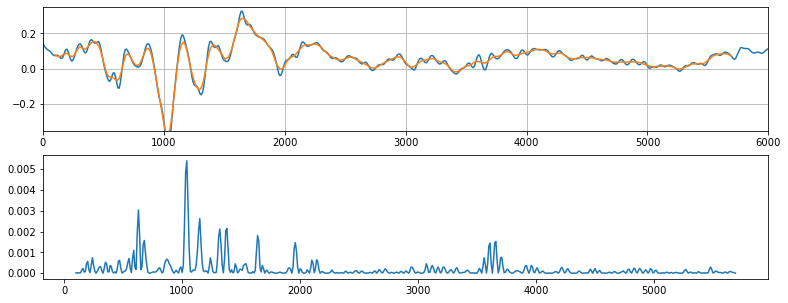

In [15]:
f, (ax, ax2) = plt.subplots(2,1,figsize=(13,5))
ax.plot(test_dist, test_sla)
ax.plot(test_dist, sla_filt)
ax2.plot(test_dist, (test_sla-sla_filt)**2)
ax.set_ylim([-.35, .35])
ax.set_xlim([0, 6000])
ax.grid()
plt.show()